In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Job_Placement_Data.csv')

In [3]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
gen = pd.get_dummies(df['gender'],drop_first = True)
hsc_sub = pd.get_dummies(df['hsc_subject'],drop_first=True)
ug = pd.get_dummies(df['undergrad_degree'],drop_first=True)
exp = pd.get_dummies(df['work_experience'],drop_first=True)
special = pd.get_dummies(df['specialisation'],drop_first=True)

In [5]:
df = df.drop(['gender','hsc_subject','undergrad_degree','work_experience','ssc_board','hsc_board','specialisation'],axis=1)

In [6]:
df = pd.concat([gen,hsc_sub,ug,exp,special,df],axis=1)
df

,M,Commerce,Science,Others,Sci&Tech,Yes,Mkt&HR,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status
0,1,1,0,0,1,0,1,67.00,91.00,58.00,55.0,58.80,Placed
1,1,0,1,0,1,1,0,79.33,78.33,77.48,86.5,66.28,Placed
2,1,0,0,0,0,0,0,65.00,68.00,64.00,75.0,57.80,Placed
3,1,0,1,0,1,0,1,56.00,52.00,52.00,66.0,59.43,Not Placed
4,1,1,0,0,0,0,0,85.80,73.60,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,0,0,0,0,0,80.60,82.00,77.60,91.0,74.49,Placed
211,1,0,1,0,1,0,0,58.00,60.00,72.00,74.0,53.62,Placed
212,1,1,0,0,0,1,0,67.00,67.00,73.00,59.0,69.72,Placed
213,0,1,0,0,0,0,1,74.00,66.00,58.00,70.0,60.23,Placed


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [8]:
X

,M,Commerce,Science,Others,Sci&Tech,Yes,Mkt&HR,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
0,1,1,0,0,1,0,1,67.00,91.00,58.00,55.0,58.80
1,1,0,1,0,1,1,0,79.33,78.33,77.48,86.5,66.28
2,1,0,0,0,0,0,0,65.00,68.00,64.00,75.0,57.80
3,1,0,1,0,1,0,1,56.00,52.00,52.00,66.0,59.43
4,1,1,0,0,0,0,0,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,0,0,0,0,0,80.60,82.00,77.60,91.0,74.49
211,1,0,1,0,1,0,0,58.00,60.00,72.00,74.0,53.62
212,1,1,0,0,0,1,0,67.00,67.00,73.00,59.0,69.72
213,0,1,0,0,0,0,1,74.00,66.00,58.00,70.0,60.23


# Standardize the Variables

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_feat = scaler.transform(X)
scaled_feat

array([[ 0.73943397,  0.95008151, -0.85666269, ..., -1.14010225,
        -1.29109087, -0.59764672],
       [ 0.73943397, -1.05254128,  1.16732059, ...,  1.51326671,
         1.08715679,  0.6876202 ],
       [ 0.73943397, -1.05254128, -0.85666269, ..., -0.32284282,
         0.21890765, -0.76947385],
       ...,
       [ 0.73943397,  0.95008151, -0.85666269, ...,  0.90304633,
        -0.98909117,  1.27870553],
       [-1.35238581,  0.95008151, -0.85666269, ..., -1.14010225,
        -0.15859198, -0.35193393],
       [ 0.73943397, -1.05254128,  1.16732059, ..., -1.82115177,
         1.27590661, -0.3536522 ]])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

## KNN

Here using K=1 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[13 10]
 [ 2 40]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Not Placed       0.87      0.57      0.68        23
      Placed       0.80      0.95      0.87        42

    accuracy                           0.82        65
   macro avg       0.83      0.76      0.78        65
weighted avg       0.82      0.82      0.80        65



## Choosing K value

In [14]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'error_rate')

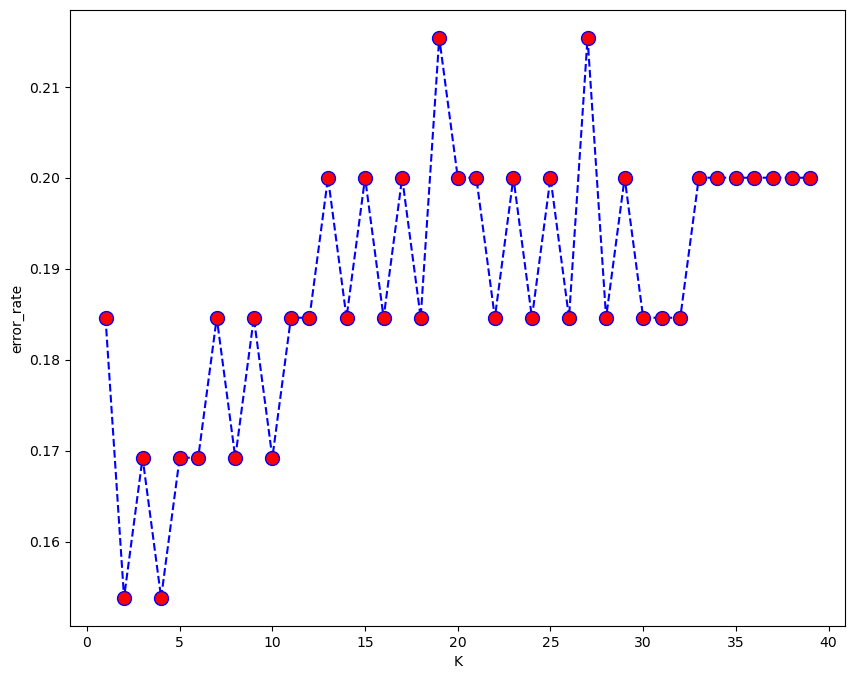

In [15]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('error_rate')

Here data is not suitable for this algorithm that's why we are getting this...from this way we can choose best K value for
our prediction and train the data and check further results

In [ ]:
from sklearn.metrics import accuracy_score,